<a href="https://colab.research.google.com/github/entenam/TF-Intro/blob/main/imdbSubwordTokenizerClassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.7.0


In [3]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised=True)

In [4]:
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder

In [5]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [10]:
sample_sentence = "This is Friday, Weekend Gonna Start"
tokenized_string = tokenizer.encode(sample_sentence)

print('The Tokenized String is {}' .format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The Original String is: {}' .format(original_string))

for ts in tokenized_string:
  print('{}-------->{}' .format(ts, tokenizer.decode([ts])))

The Tokenized String is [62, 9, 7519, 2, 1231, 3108, 228, 1016, 2094, 4, 2105, 8045]
The Original String is: This is Friday, Weekend Gonna Start
62-------->This 
9-------->is 
7519-------->Friday
2-------->, 
1231-------->We
3108-------->ek
228-------->end 
1016-------->Go
2094-------->nn
4-------->a 
2105-------->Star
8045-------->t


In [16]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [18]:
embedding_dim = 64
num_epochs = 10

model = tf.keras.Sequential([
                         tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                         tf.keras.layers.GlobalAveragePooling1D(),
                         tf.keras.layers.Dense(6, activation='relu'),
                         tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_dataset, epochs=num_epochs, validation_data= test_dataset)

Epoch 1/10
391/391 [==============================] - 19s 45ms/step - loss: 0.6796 - accuracy: 0.6147 - val_loss: 0.6419 - val_accuracy: 0.7465
Epoch 2/10
391/391 [==============================] - 17s 43ms/step - loss: 0.5462 - accuracy: 0.7932 - val_loss: 0.4695 - val_accuracy: 0.8318
Epoch 3/10
391/391 [==============================] - 18s 44ms/step - loss: 0.3923 - accuracy: 0.8621 - val_loss: 0.3764 - val_accuracy: 0.8626
Epoch 4/10
391/391 [==============================] - 18s 43ms/step - loss: 0.3149 - accuracy: 0.8904 - val_loss: 0.3392 - val_accuracy: 0.8678
Epoch 5/10
391/391 [==============================] - 18s 44ms/step - loss: 0.2720 - accuracy: 0.9036 - val_loss: 0.3256 - val_accuracy: 0.8715
Epoch 6/10
391/391 [==============================] - 18s 44ms/step - loss: 0.2454 - accuracy: 0.9136 - val_loss: 0.3106 - val_accuracy: 0.8771
Epoch 7/10
391/391 [==============================] - 18s 43ms/step - loss: 0.2226 - accuracy: 0.9225 - val_loss: 0.3063 - val_accuracy:

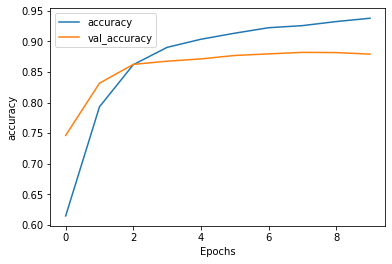

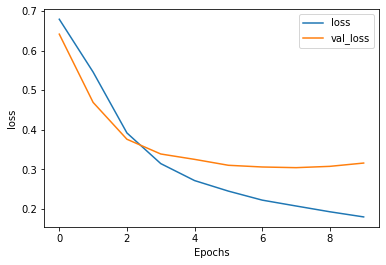

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [24]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs_imdb.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_imdb.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs_imdb.tsv')
  files.download('meta_imdb.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>